In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import List

from hypothesis_testing_pipeline import *


In [2]:
def print_vector_results(arr: np.ndarray) -> None:
    
    for i in range(arr.shape[0]):
        print(f"Question {i+1}: {arr[i]}")

# Preprocess

In [3]:
data = pd.read_csv('survey_data.csv', header=None)

question_list = []
q_num = 0
for i in range(len(data)):
    if i % 15 == 0:
        q_num += 1
    question_list.append(f'Q{q_num}')
data['Question'] = question_list

col_list = [f'Rater{i}' for i in range(1,13)] + ['Question']
data.columns = col_list

# The creator of the question: Human-made, PCMG, GPT2-based
creators = ['Human-made']*5 + ['PCMG']*5 + ['GPT2-based']*5
creator_list = creators*(len(data)//15)
# The type of data: Solvability or Readability
types = ['Solvability'] + ['Readability']*4
type_list = types*(len(data)//5)
data['Creator'] = creator_list
data['Type'] = type_list

In [4]:
solvability_data = data[data.Type == 'Solvability']
readability_data = data[data.Type == 'Readability']

### Solvability Vectors

In [5]:
human_s = solvability_data[solvability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_s = solvability_data[solvability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_s = solvability_data[solvability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

### Readability Vectors

In [6]:
# all the evaluation scores grouped by creator
human_r = readability_data[readability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_r = readability_data[readability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_r = readability_data[readability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

# Distribution Visualization

## Solvability DataFrame for Visualization

In [7]:
solvability_data_vis = solvability_data.copy()

In [8]:
solvability_data_vis['ScoreSum'] = solvability_data.sum(axis=1, numeric_only=True)
solvability_data_vis['ScoreMean'] = solvability_data.mean(axis=1, numeric_only=True)
solvability_data_vis['ScoreMedian'] = solvability_data.median(axis=1, numeric_only=True)

## Plots for Solvability Data

<AxesSubplot:xlabel='Question', ylabel='ScoreSum'>

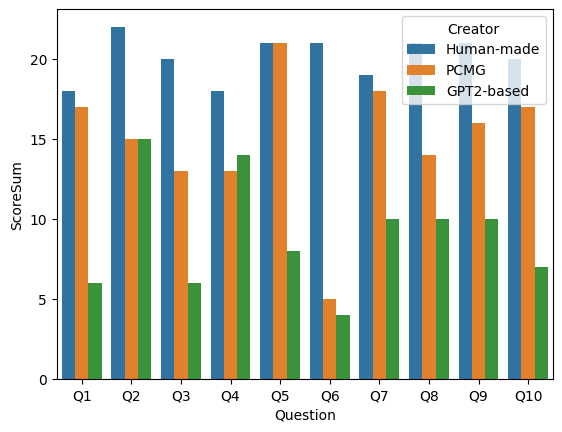

In [9]:
sns.barplot(data=solvability_data_vis, x="Question", y="ScoreSum", hue="Creator")

<AxesSubplot:xlabel='ScoreSum', ylabel='Creator'>

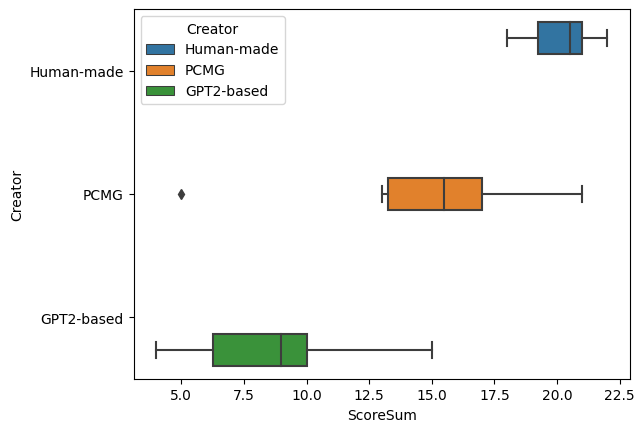

In [10]:
sns.boxplot(data=solvability_data_vis, x="ScoreSum", y="Creator", hue="Creator")

## Readability DataFrame for Visualization

In [11]:
readability_data_grouped = readability_data.groupby(['Creator','Question'],sort=False).mean()

In [12]:
readability_data_grouped_vis = readability_data_grouped.copy()

In [13]:
readability_data_grouped_vis['ScoreSum'] = readability_data_grouped.sum(axis=1, numeric_only=True)
readability_data_grouped_vis['ScoreMean'] = readability_data_grouped.mean(axis=1, numeric_only=True)
readability_data_grouped_vis['ScoreMedian'] = readability_data_grouped.median(axis=1, numeric_only=True)

In [14]:
readability_data_grouped_vis['Creator'] = ['Human-made','PCMG','GPT2-based']*10
q_type = []
for i in range(1,11):
    q_type += [f'Q{i}']*3
readability_data_grouped_vis['Question'] = q_type

## Plots for Readability Data

<AxesSubplot:xlabel='Question', ylabel='ScoreSum'>

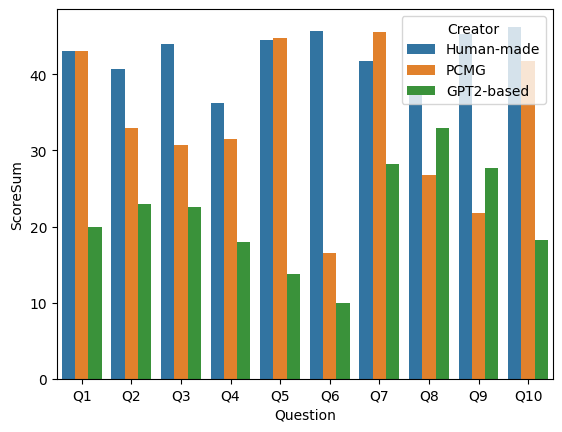

In [15]:
sns.barplot(data=readability_data_grouped_vis, x="Question", y="ScoreSum", hue="Creator")

<AxesSubplot:xlabel='ScoreSum', ylabel='Creator'>

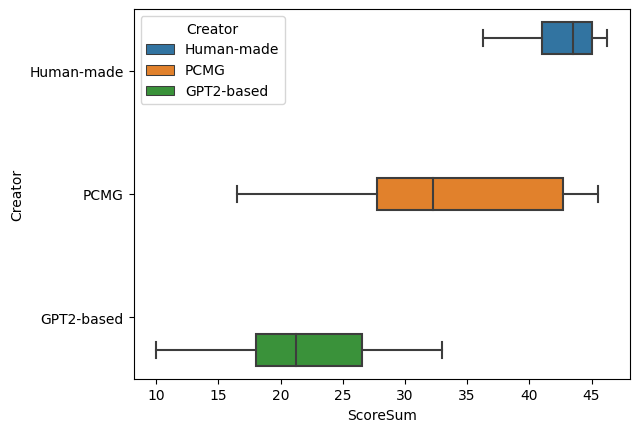

In [16]:
sns.boxplot(data=readability_data_grouped_vis, x="ScoreSum", y="Creator", hue="Creator")

# Point Statistics

## Mean Score of Each MWP --> 1x10 Vector

### Solvability

In [17]:
human_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'Human-made']['ScoreMean'].to_numpy()
pcmg_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'PCMG']['ScoreMean'].to_numpy()
gpt2_s_mean_q = solvability_data_vis[solvability_data_vis.Creator == 'GPT2-based']['ScoreMean'].to_numpy()

In [18]:

def grouped_avg_of_question(arr: np.ndarray, n: int=4) -> np.ndarray:
    result = np.cumsum(arr, 0)[n-1::n]/float(n)
    result[1:] = result[1:] - result[:-1]
    return result

### Readability

In [19]:
human_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'Human-made']['ScoreMean'].to_numpy()
pcmg_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'PCMG']['ScoreMean'].to_numpy()
gpt2_r_mean_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'GPT2-based']['ScoreMean'].to_numpy()

In [20]:
print("Human-made Mean")
print_vector_results(human_r_mean_q)

Human-made Mean
Question 1: 3.5833333333333335
Question 2: 3.3958333333333335
Question 3: 3.6666666666666665
Question 4: 3.0208333333333335
Question 5: 3.7083333333333335
Question 6: 3.8125
Question 7: 3.4791666666666665
Question 8: 3.1875
Question 9: 3.7708333333333335
Question 10: 3.8541666666666665


In [21]:
print("PCMG Mean")
print_vector_results(pcmg_r_mean_q)

PCMG Mean
Question 1: 3.5833333333333335
Question 2: 2.75
Question 3: 2.5625
Question 4: 2.625
Question 5: 3.7291666666666665
Question 6: 1.375
Question 7: 3.7916666666666665
Question 8: 2.2291666666666665
Question 9: 1.8125
Question 10: 3.4791666666666665


In [22]:
print("GPT2-based Mean")
print_vector_results(gpt2_r_mean_q)

GPT2-based Mean
Question 1: 1.6666666666666667
Question 2: 1.9166666666666667
Question 3: 1.875
Question 4: 1.5
Question 5: 1.1458333333333333
Question 6: 0.8333333333333334
Question 7: 2.3541666666666665
Question 8: 2.75
Question 9: 2.3125
Question 10: 1.5208333333333333


## Mean Score of Each Creator --> Scalar

In [23]:
# Solvability
human_s_mean = human_s_mean_q.mean(axis=0)
pcmg_s_mean = pcmg_s_mean_q.mean(axis=0)
gpt2_s_mean = gpt2_s_mean_q.mean(axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_mean}, PCMG:{pcmg_s_mean}, GPT2-based: {gpt2_s_mean}')

풀이 가능성 Mean
Human-made: 1.675, PCMG:1.2416666666666667, GPT2-based: 0.75


In [24]:
# Readability
human_r_mean = human_r_mean_q.mean(axis=0)
pcmg_r_mean = pcmg_r_mean_q.mean(axis=0)
gpt2_r_mean = gpt2_r_mean_q.mean(axis=0)
print(f'독해 가능성 Mean\nHuman-made: {human_r_mean}, PCMG:{pcmg_r_mean}, GPT2-based: {gpt2_r_mean}')

독해 가능성 Mean
Human-made: 3.5479166666666666, PCMG:2.79375, GPT2-based: 1.7874999999999996


## Std. Dev. of Each Creator --> Scalar

In [25]:
# Solvability
human_s_std = human_s_mean_q.std(axis=0)
pcmg_s_std = pcmg_s_mean_q.std(axis=0)
gpt2_s_std = gpt2_s_mean_q.std(axis=0)
print(f'풀이 가능성 Std. Dev.\nHuman-made: {human_s_std}, PCMG:{pcmg_s_std}, GPT2-based: {gpt2_s_std}')

풀이 가능성 Std. Dev.
Human-made: 0.10833333333333332, PCMG:0.3363406011768427, GPT2-based: 0.27888667551135854


In [26]:
# Solvability
human_r_std = human_r_mean_q.std(axis=0)
pcmg_r_std = pcmg_r_mean_q.std(axis=0)
gpt2_r_std = gpt2_r_mean_q.std(axis=0)
print(f'독해 가능성 Std. Dev.\nHuman-made: {human_r_std}, PCMG:{pcmg_r_std}, GPT2-based: {gpt2_r_std}')

독해 가능성 Std. Dev.
Human-made: 0.26270659859326795, PCMG:0.7963921467398387, GPT2-based: 0.551182441060429


## Sum Score of Each MWP (For Median calculation)

### Solvability

In [27]:
human_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'Human-made']['ScoreSum'].to_numpy()
pcmg_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'PCMG']['ScoreSum'].to_numpy()
gpt2_s_sum_q = solvability_data_vis[solvability_data_vis.Creator == 'GPT2-based']['ScoreSum'].to_numpy()

### Readability

In [28]:
human_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'Human-made']['ScoreSum'].to_numpy()
pcmg_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'PCMG']['ScoreSum'].to_numpy()
gpt2_r_sum_q = readability_data_grouped_vis[readability_data_grouped_vis.Creator == 'GPT2-based']['ScoreSum'].to_numpy()

## Median Score of Each Creator

### Solvability

In [29]:
human_s_median = np.median(human_s_sum_q, axis=0)
pcmg_s_median = np.median(pcmg_s_sum_q, axis=0)
gpt2_s_median = np.median(gpt2_s_sum_q, axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_median}, PCMG:{pcmg_s_median}, GPT2-based: {gpt2_s_median}')

풀이 가능성 Mean
Human-made: 20.5, PCMG:15.5, GPT2-based: 9.0


### Readability

In [30]:
human_r_median = np.median(human_r_sum_q, axis=0)
pcmg_r_median = np.median(pcmg_r_sum_q, axis=0)
gpt2_r_median = np.median(gpt2_r_sum_q, axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_median}, PCMG:{pcmg_s_median}, GPT2-based: {gpt2_s_median}')

풀이 가능성 Mean
Human-made: 20.5, PCMG:15.5, GPT2-based: 9.0


# Hypotheses

## Using Mean

In [31]:
# hypo_1_mean = np.concatenate((pcmg_s_mean_q.reshape(1,-1),human_s_mean_q.reshape(1,-1)),axis=0)
# hypo_2_mean = np.concatenate((pcmg_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)
# hypo_3_mean = np.concatenate((pcmg_s_mean_q.reshape(1,-1),gpt2_s_mean_q.reshape(1,-1)),axis=0)
# hypo_4_mean = np.concatenate((pcmg_r_mean_q.reshape(1,-1),gpt2_r_mean_q.reshape(1,-1)),axis=0)

In [32]:
hypo_1 = np.concatenate((pcmg_s_sum_q.reshape(1,-1),human_s_sum_q.reshape(1,-1)),axis=0)
hypo_2 = np.concatenate((pcmg_r_sum_q.reshape(1,-1),human_r_sum_q.reshape(1,-1)),axis=0)
# hypo_3 = np.concatenate((pcmg_s_sum_q.reshape(1,-1),gpt2_s_sum_q.reshape(1,-1)),axis=0)
# hypo_4 = np.concatenate((pcmg_r_sum_q.reshape(1,-1),gpt2_r_sum_q.reshape(1,-1)),axis=0)
hypo_3 = np.concatenate((gpt2_s_sum_q.reshape(1,-1),pcmg_s_sum_q.reshape(1,-1)),axis=0)
hypo_4 = np.concatenate((gpt2_r_sum_q.reshape(1,-1),pcmg_r_sum_q.reshape(1,-1)),axis=0)

In [33]:
# hypo_1_median = np.concatenate((pcmg_s.reshape(1,-1),human_s.reshape(1,-1)),axis=0)
# hypo_2_median = np.concatenate((pcmg_r.reshape(1,-1),human_r.reshape(1,-1)),axis=0)
# hypo_3_median = np.concatenate((pcmg_s.reshape(1,-1),gpt2_s.reshape(1,-1)),axis=0)
# hypo_4_median = np.concatenate((pcmg_r.reshape(1,-1),gpt2_r.reshape(1,-1)),axis=0)

# Independence Testing of Ordinal Data (Applies for only Mean Hypo.)

In [34]:
IndependenceTester(hypo_1).print_results()

Statistic: -0.1315058874129602, p-value: 0.7172543548947553, Independent?: True


In [35]:
IndependenceTester(hypo_2).print_results()

Statistic: -0.0015144063960056131, p-value: 0.9966872436063082, Independent?: True


In [36]:
IndependenceTester(hypo_3).print_results()

Statistic: 0.2443117679049839, p-value: 0.4963411399870916, Independent?: True


In [37]:
IndependenceTester(hypo_4).print_results()

Statistic: 0.0011074221487618052, p-value: 0.9975775170204794, Independent?: True


# Skewness Test

## Solvability

In [38]:
concat_vec_s = np.concatenate([human_s_sum_q.reshape((1,-1)), pcmg_s_sum_q.reshape((1,-1)), gpt2_s_sum_q.reshape((1,-1))], axis=1)
SkewTester(concat_vec_s).print_results()

Statistic: -1.1690109502349997, p-value: 0.24239921957252697, Skewed?: False


In [39]:
SkewTester(human_s_sum_q.reshape((1,-1))).print_results()

Statistic: -0.8147039535789896, p-value: 0.41524178976383075, Skewed?: False


In [40]:
SkewTester(pcmg_s_sum_q.reshape((1,-1))).print_results()

Statistic: -1.8509329336189928, p-value: 0.06417920209304104, Skewed?: False


In [41]:
SkewTester(gpt2_s_sum_q.reshape((1,-1))).print_results()

Statistic: 0.7400613740836575, p-value: 0.45926275469669986, Skewed?: False


## Readability

In [42]:
concat_vec_r = np.concatenate([human_r_sum_q.reshape((1,-1)), pcmg_r_sum_q.reshape((1,-1)), gpt2_r_sum_q.reshape((1,-1))], axis=1)
SkewTester(concat_vec_r).print_results()

Statistic: -0.9198727588620432, p-value: 0.357639255853204, Skewed?: False


In [43]:
SkewTester(human_r_sum_q.reshape((1,-1))).print_results()

Statistic: -1.2865910583768865, p-value: 0.1982368619306507, Skewed?: False


In [44]:
SkewTester(pcmg_r_sum_q.reshape((1,-1))).print_results()

Statistic: -0.48453008937508324, p-value: 0.6280097153800234, Skewed?: False


In [45]:
SkewTester(gpt2_r_sum_q.reshape((1,-1))).print_results()

Statistic: 0.04677566669964622, p-value: 0.96269202296045, Skewed?: False


# ~~Hypothesis Testing (Mean)~~

In [46]:
# PAIRED = False
# NORMAL = False

In [47]:
# HypothesisTester(hypo_1_mean, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

In [48]:
# HypothesisTester(hypo_2_mean, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

In [49]:
# HypothesisTester(hypo_3_mean, is_pair=PAIRED, normality=NORMAL).print_results()

In [50]:
# HypothesisTester(hypo_4_mean, is_pair=PAIRED, normality=NORMAL).print_results()

## Alternatives

In [51]:
# hypo_4_alt = np.concatenate((gpt2_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)

In [52]:
# HypothesisTester(hypo_4_alt, is_pair=PAIRED, normality=NORMAL).print_results()

In [53]:
# HypothesisTester(hypo_4_alt, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

# Hypothesis Testing (Median)

In [54]:
PAIRED = False
NORMAL = False

In [55]:
hypo_1.sort(axis=1)
HypothesisTester(hypo_1, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.013894599864857934, reject_alternative: False


In [56]:
hypo_2.sort(axis=1)
HypothesisTester(hypo_2, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()


Mann-Whitney U-test TOST
p-value: 0.01126645689337952, reject_alternative: False


In [57]:
hypo_3.sort(axis=1)
HypothesisTester(hypo_3, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.03626386644186757, reject_alternative: False


In [58]:
hypo_4.sort(axis=1)
HypothesisTester(hypo_4, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.02121212121212121, reject_alternative: False
